# Visualizing U-DARec and I-DARec Embeddings
This notebook helps you visualize the embeddings generated by U-DARec and I-DARec preprocessing. You can select .npy files, reduce their dimensionality, and plot them for comparison.

In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Load or Generate Embeddings

data_dir = 'data/test'
files = [f for f in os.listdir(data_dir) if f.endswith('.npy')]

u_files = sorted([f for f in files if f.startswith('U_')])
i_files = sorted([f for f in files if f.startswith('I_')])

u_dropdown = widgets.Dropdown(options=u_files, description='U-DARec:')
i_dropdown = widgets.Dropdown(options=i_files, description='I-DARec:')

load_button = widgets.Button(description='Load Embeddings')
output = widgets.Output()

embeddings = {}

@output.capture()
def load_embeddings(b):
    embeddings.clear()
    u_path = os.path.join(data_dir, u_dropdown.value)
    i_path = os.path.join(data_dir, i_dropdown.value)
    embeddings['U'] = np.load(u_path)
    embeddings['I'] = np.load(i_path)
    print(f"Loaded U: {u_dropdown.value}, shape: {embeddings['U'].shape}")
    print(f"Loaded I: {i_dropdown.value}, shape: {embeddings['I'].shape}")

load_button.on_click(load_embeddings)
display(u_dropdown, i_dropdown, load_button, output)

Dropdown(description='U-DARec:', options=('U_ratings_Amazon_Instant_Video.csv.npy', 'U_ratings_Apps_for_Androi…

Dropdown(description='I-DARec:', options=('I_ratings_Amazon_Instant_Video.csv.npy', 'I_ratings_Apps_for_Androi…

Button(description='Load Embeddings', style=ButtonStyle())

Output()

In [3]:
# Dimensionality Reduction for Visualization

def reduce_embeddings(emb, method='PCA', n_components=2):
    if method == 'PCA':
        reducer = PCA(n_components=n_components)
    elif method == 'TSNE':
        reducer = TSNE(n_components=n_components, random_state=42)
    else:
        raise ValueError('Unknown method')
    return reducer.fit_transform(emb)

# Example usage:
# reduced = reduce_embeddings(embeddings['U'], method='PCA')

In [4]:
# Plot Embeddings in 2D

def plot_embeddings_2d(emb_U, emb_I, title_U='U-DARec', title_I='I-DARec'):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=emb_U[:, 0], y=emb_U[:, 1], s=20)
    plt.title(title_U)
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=emb_I[:, 0], y=emb_I[:, 1], s=20)
    plt.title(title_I)
    plt.show()

# Example usage after loading and reducing:
# emb_U_2d = reduce_embeddings(embeddings['U'], method='PCA')
# emb_I_2d = reduce_embeddings(embeddings['I'], method='PCA')
# plot_embeddings_2d(emb_U_2d, emb_I_2d)

In [5]:
# Interactive Visualization of Embeddings
import plotly.express as px

def plotly_embeddings_2d(emb, title):
    fig = px.scatter(x=emb[:, 0], y=emb[:, 1], title=title)
    fig.show()

# Example usage:
# plotly_embeddings_2d(emb_U_2d, 'U-DARec Embeddings')
# plotly_embeddings_2d(emb_I_2d, 'I-DARec Embeddings')

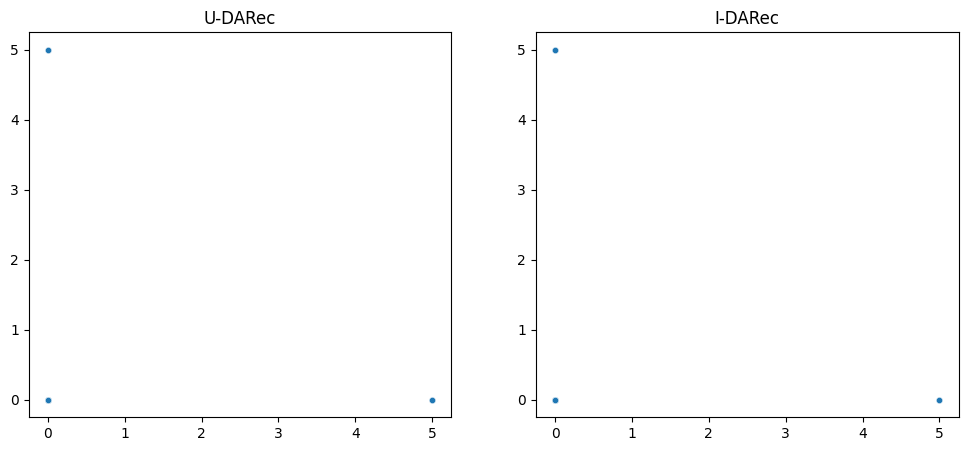

In [8]:
plotly_embeddings_2d(embeddings['U'], embeddings['I'])